Імпортуємо необхідні бібліотеки

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Зчитання датафрейму

In [184]:
carIC = pd.read_csv("Car_Insurance_Claim.csv")
carIC.head(10)

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
5,5,877557,40-64,female,majority,20-29y,high school,upper class,0.6191273725847388,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,6,930134,65+,male,majority,30y+,high school,upper class,0.4929435502195342,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,7,461006,26-39,female,majority,0-9y,university,working class,0.468689297434465,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,8,68366,40-64,female,majority,20-29y,university,working class,0.5218149362971065,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,9,445911,40-64,female,majority,0-9y,NaN,upper class,0.5615310319383646,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


Видаляємо непотрібні стовпці

In [185]:
carIC = carIC.drop(['Unnamed: 0', 'ID', 'GENDER', 'RACE', 'EDUCATION', 'MARRIED', 'CHILDREN', 'POSTAL_CODE'], axis=1)
carIC.head(10)

,AGE,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,0-9y,upper class,0.629027313918201,1.0,after 2015,12000.0,sedan,0,0,0,0.0
1,16-25,0-9y,poverty,0.3577571170184627,0.0,before 2015,16000.0,sedan,0,0,0,1.0
2,16-25,0-9y,working class,0.4931457852181982,1.0,before 2015,11000.0,sedan,0,0,0,0.0
3,16-25,0-9y,working class,0.2060128507324556,1.0,before 2015,11000.0,sedan,0,0,0,0.0
4,26-39,10-19y,working class,0.3883658881572184,1.0,before 2015,12000.0,sedan,2,0,1,1.0
5,40-64,20-29y,upper class,0.6191273725847388,1.0,after 2015,13000.0,sedan,3,0,3,0.0
6,65+,30y+,upper class,0.4929435502195342,0.0,after 2015,13000.0,sedan,7,0,3,0.0
7,26-39,0-9y,working class,0.468689297434465,0.0,after 2015,14000.0,sedan,0,0,0,1.0
8,40-64,20-29y,working class,0.5218149362971065,0.0,before 2015,13000.0,sedan,0,0,0,0.0
9,40-64,0-9y,upper class,0.5615310319383646,1.0,before 2015,11000.0,sedan,0,0,0,1.0


Перетворення рядкових стовпців на числові та нормалізація значень

In [186]:
numeric_cols = ["CREDIT_SCORE", "VEHICLE_OWNERSHIP",
                "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS", "OUTCOME"]

carIC[numeric_cols] = carIC[numeric_cols].replace("none", np.nan) # Replace none with NaN

for col in numeric_cols:
    carIC[col] = pd.to_numeric(carIC[col], errors='coerce')

carIC[numeric_cols].isna().sum()

CREDIT_SCORE           1072
VEHICLE_OWNERSHIP       100
ANNUAL_MILEAGE         1050
SPEEDING_VIOLATIONS      99
DUIS                    100
PAST_ACCIDENTS          100
OUTCOME                 100
dtype: int64

Перевірка, скільки відсутніх значень знайдено в стовпцях

In [187]:
carIC["CREDIT_SCORE"] = carIC["CREDIT_SCORE"].fillna(carIC["CREDIT_SCORE"].median())
carIC["VEHICLE_OWNERSHIP"] = carIC["VEHICLE_OWNERSHIP"].fillna(0)
carIC["ANNUAL_MILEAGE"] = carIC["ANNUAL_MILEAGE"].fillna(carIC["ANNUAL_MILEAGE"].median())
carIC["SPEEDING_VIOLATIONS"] = carIC["SPEEDING_VIOLATIONS"].fillna(0)
carIC["DUIS"] = carIC["DUIS"].fillna(0)
carIC["PAST_ACCIDENTS"] = carIC["PAST_ACCIDENTS"].fillna(0)
carIC["OUTCOME"] = carIC["OUTCOME"].fillna(0)

carIC[numeric_cols].isna().sum()


CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [188]:
columns_to_fill = ['AGE', 'DRIVING_EXPERIENCE', 'INCOME', 'VEHICLE_YEAR']

carIC[columns_to_fill] = carIC[columns_to_fill].replace("none", np.nan) # Replace none with NaN

carIC[columns_to_fill].isna().sum()

AGE                   100
DRIVING_EXPERIENCE    100
INCOME                  0
VEHICLE_YEAR          100
dtype: int64

Перевірка, скільки відсутніх значень знайдено в стовпцях

In [189]:
for column in columns_to_fill:
    most_frequent_value = carIC[column].mode()[0] # Find the most frequent value
    carIC[column] = carIC[column].fillna(most_frequent_value) # Fill missing values with the most frequent value

carIC[columns_to_fill].isna().sum()

AGE                   0
DRIVING_EXPERIENCE    0
INCOME                0
VEHICLE_YEAR          0
dtype: int64

Статистика

- середнє значення

In [190]:
mean_values = carIC.mean(numeric_only=True)
mean_values

CREDIT_SCORE               0.51679
VEHICLE_OWNERSHIP          0.69070
ANNUAL_MILEAGE         11730.10000
SPEEDING_VIOLATIONS        1.46710
DUIS                       0.23650
PAST_ACCIDENTS             1.04680
OUTCOME                    0.31050
dtype: float64

- Медіана

In [191]:
median_values = carIC.median(numeric_only=True)
median_values

CREDIT_SCORE               0.524905
VEHICLE_OWNERSHIP          1.000000
ANNUAL_MILEAGE         12000.000000
SPEEDING_VIOLATIONS        0.000000
DUIS                       0.000000
PAST_ACCIDENTS             0.000000
OUTCOME                    0.000000
dtype: float64

 Мода

In [192]:
mode_values = carIC.mode().iloc[0]
mode_values

AGE                          26-39
DRIVING_EXPERIENCE            0-9y
INCOME                 upper class
CREDIT_SCORE              0.524905
VEHICLE_OWNERSHIP              1.0
VEHICLE_YEAR           before 2015
ANNUAL_MILEAGE             12000.0
VEHICLE_TYPE                 sedan
SPEEDING_VIOLATIONS            0.0
DUIS                           0.0
PAST_ACCIDENTS                 0.0
OUTCOME                        0.0
Name: 0, dtype: object

 Min, Max

In [193]:
min_values = carIC.min(numeric_only=True)
max_values = carIC.max(numeric_only=True)
print("Min\n", min_values)
print("\nMax\n", max_values)

Min
 CREDIT_SCORE              0.053358
VEHICLE_OWNERSHIP         0.000000
ANNUAL_MILEAGE         2000.000000
SPEEDING_VIOLATIONS       0.000000
DUIS                      0.000000
PAST_ACCIDENTS            0.000000
OUTCOME                   0.000000
dtype: float64

Max
 CREDIT_SCORE               0.960819
VEHICLE_OWNERSHIP          1.000000
ANNUAL_MILEAGE         22000.000000
SPEEDING_VIOLATIONS       22.000000
DUIS                       6.000000
PAST_ACCIDENTS            15.000000
OUTCOME                    1.000000
dtype: float64


Унікальні значення

In [194]:
unique_values = carIC.nunique()
unique_values

AGE                       4
DRIVING_EXPERIENCE        4
INCOME                    4
CREDIT_SCORE           8929
VEHICLE_OWNERSHIP         2
VEHICLE_YEAR              2
ANNUAL_MILEAGE           21
VEHICLE_TYPE              3
SPEEDING_VIOLATIONS      21
DUIS                      7
PAST_ACCIDENTS           15
OUTCOME                   2
dtype: int64

Групування з аналізом.Наприклад, 'ANNUAL_MILEAGE' є медіаною

In [195]:
grouped_median = carIC.groupby('ANNUAL_MILEAGE').median(numeric_only=True)
grouped_median

,CREDIT_SCORE,VEHICLE_OWNERSHIP,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ANNUAL_MILEAGE,,,,,,
2000.0,0.619057,1.0,7.5,0.0,1.0,0.0
3000.0,0.481984,1.0,2.0,0.0,1.0,0.0
4000.0,0.524905,1.0,4.0,0.0,1.0,0.0
5000.0,0.553906,1.0,2.0,0.0,0.0,0.0
6000.0,0.533131,1.0,3.0,0.0,1.0,0.0
7000.0,0.536027,1.0,2.0,0.0,1.0,0.0
8000.0,0.545544,1.0,2.0,0.0,1.0,0.0
9000.0,0.541304,1.0,1.0,0.0,1.0,0.0
10000.0,0.533102,1.0,1.0,0.0,0.0,0.0


Візуалізація даних

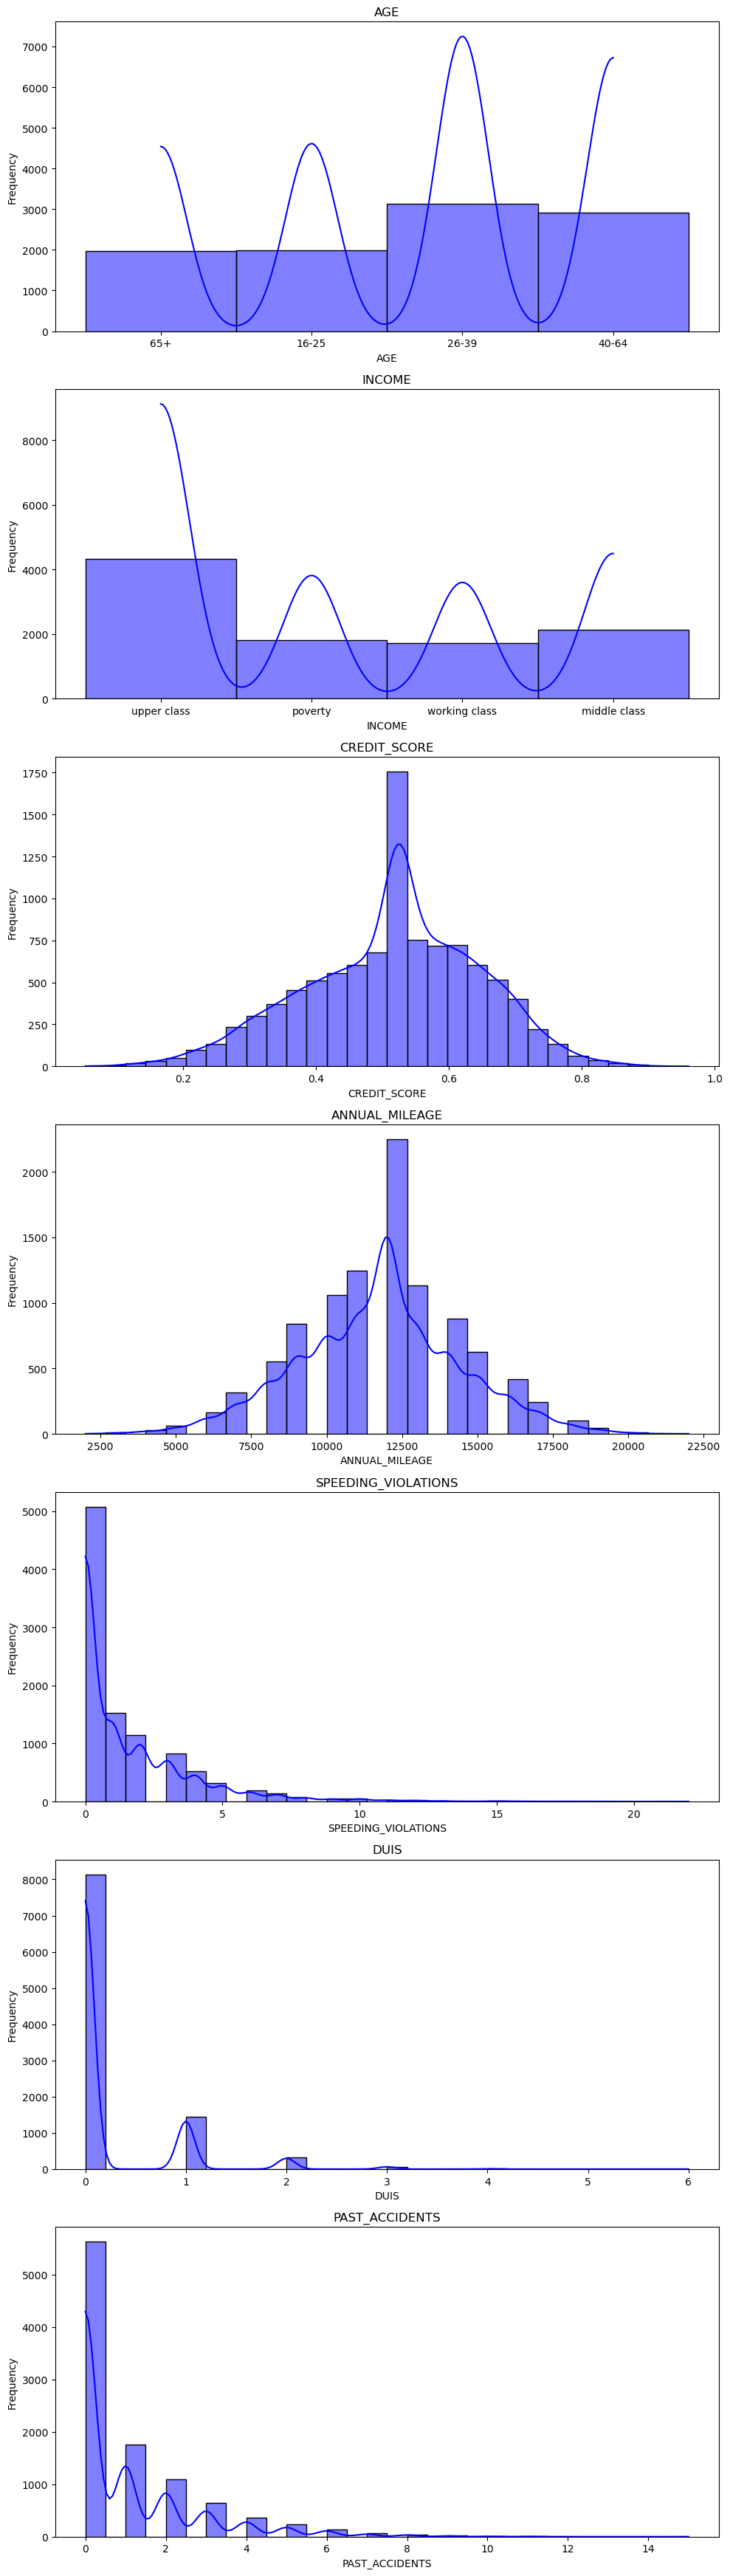

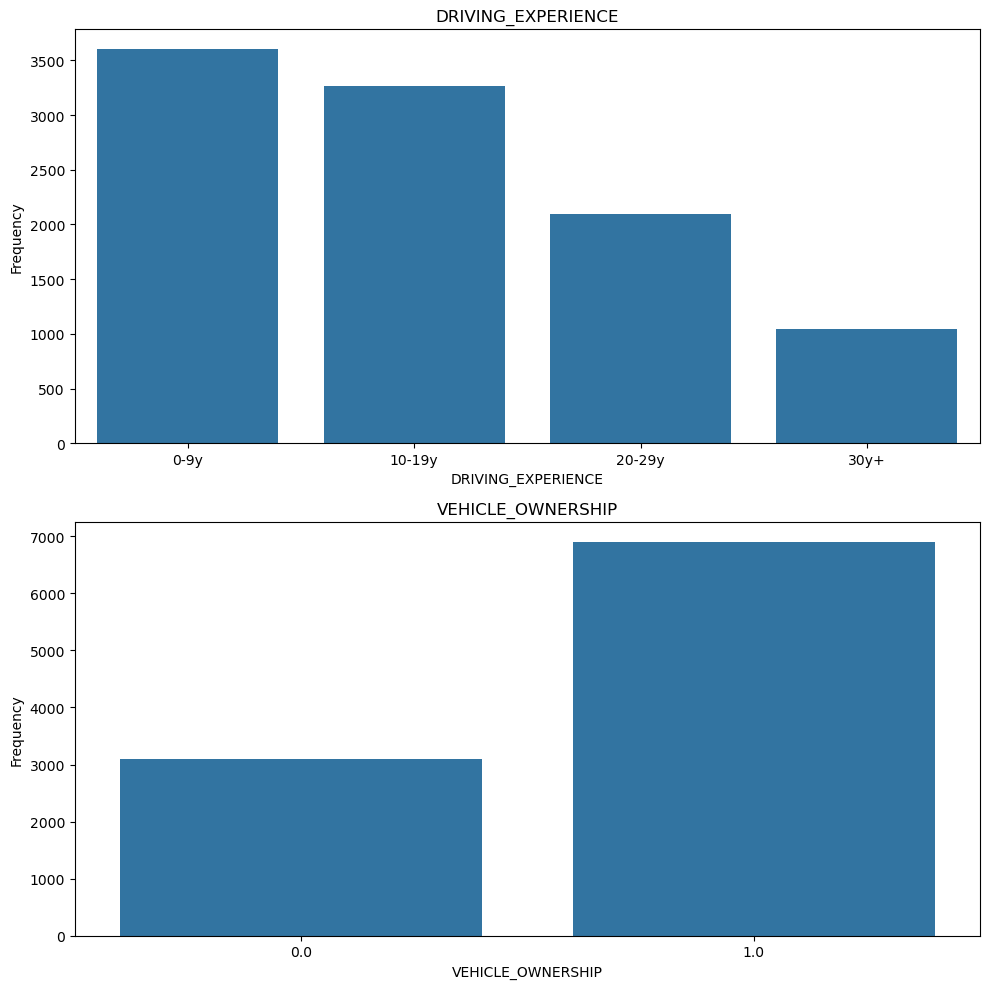

In [196]:
numerical_columns = ['AGE', 'INCOME', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

plt.figure(figsize=(10, len(numerical_columns) * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(carIC[column], kde=True, bins=30, color='blue')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

categorical_columns = ['DRIVING_EXPERIENCE', 'VEHICLE_OWNERSHIP']

plt.figure(figsize=(10, len(categorical_columns) * 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=carIC, x=column, hue=None, legend=False)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

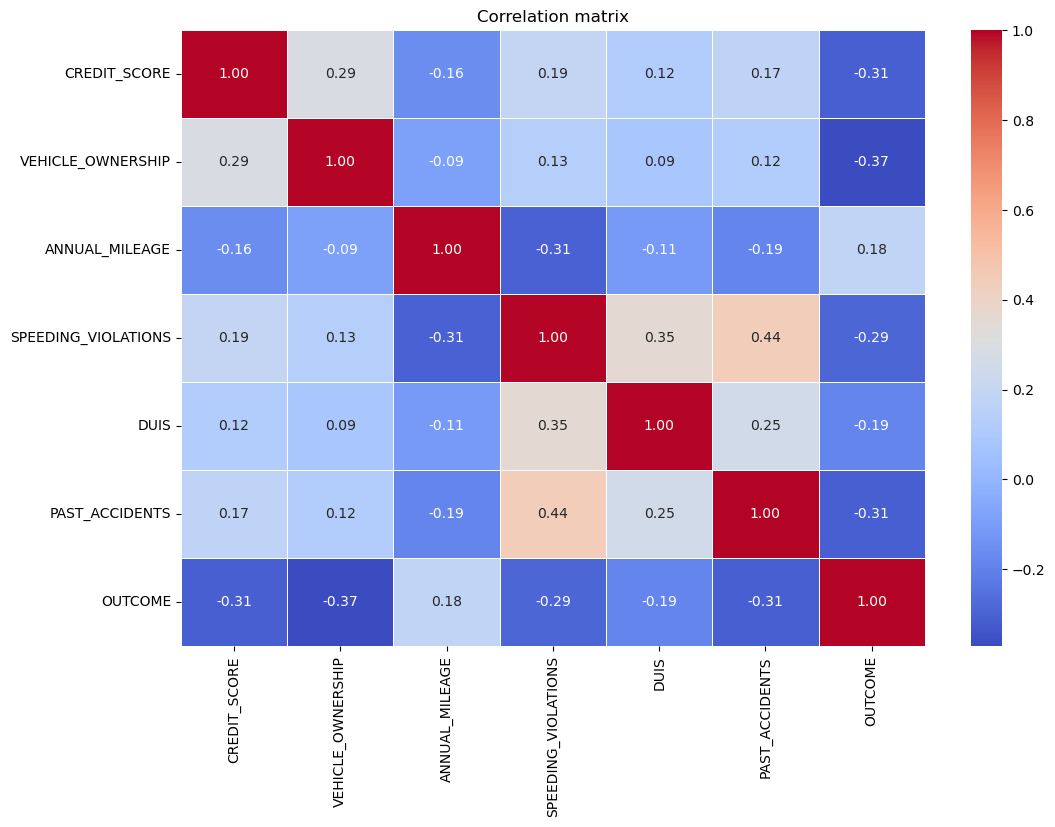

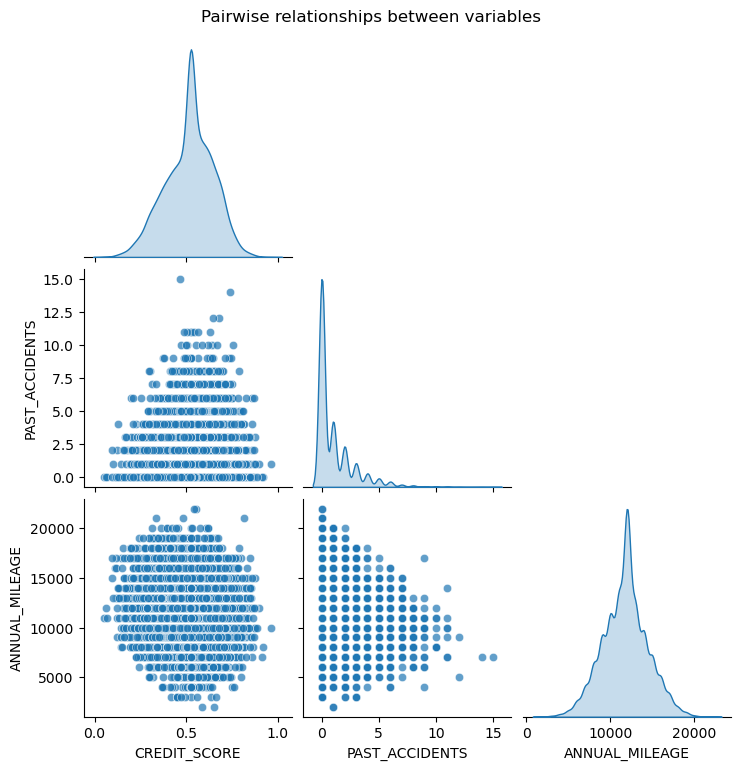

In [197]:
plt.figure(figsize=(12, 8))
correlation_matrix = carIC.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

pairplot_columns = ['CREDIT_SCORE', 'INCOME', 'PAST_ACCIDENTS', 'AGE', 'ANNUAL_MILEAGE']
sns.pairplot(carIC[pairplot_columns], diag_kind="kde", corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise relationships between variables", y=1.02)
plt.show()